In [1]:
#project goal is to build and train a regression model on the Capital Bike Share (Washington, D.C.) Kaggle data set,
#in order to predict demand for bicycle rentals at any given hour, based on time and weather,

Here the explanation of the columns in the data from Kaggle:
    
.datetime - hourly date + timestamp

.season - 1 = spring, 2 = summer, 3 = fall, 4 = winter

.holiday - whether the day is considered a holiday

.workingday - whether the day is neither a weekend nor holiday

.weather - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
    
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
    
.temp - temperature in Celsius

.atemp - "feels like" temperature in Celsius

.humidity - relative humidity

.windspeed - wind speed

.casual - number of non-registered user rentals initiated

.registered - number of registered user rentals initiated

.count - number of total rentals

In [2]:
#pip install MarkupSafe==2.0.1

In [3]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from pandas_profiling import ProfileReport

from sklearn.metrics import mean_squared_error, mean_squared_log_error, mean_absolute_error

from sklearn.linear_model import Lasso,PoissonRegressor,LinearRegression
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder,KBinsDiscretizer, PolynomialFeatures

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.dummy import DummyClassifier


In [4]:
#reading csv file into pandas
train = pd.read_csv('train.csv', parse_dates=True, index_col=0)#Parse_dates convert the datetime from string to date
train.sample(5)


season  holiday  workingday  weather   temp   atemp  \
datetime                                                                   
2011-04-03 04:00:00       2        0           0        1  11.48  15.150   
2012-06-01 23:00:00       2        0           1        3  24.60  27.275   
2011-09-15 16:00:00       3        0           1        2  22.14  25.760   
2011-12-14 22:00:00       4        0           1        1  13.94  16.665   
2011-01-06 13:00:00       1        0           1        1  10.66  13.635   

                     humidity  windspeed  casual  registered  count  
datetime                                                             
2011-04-03 04:00:00        70     6.0032       3           0      3  
2012-06-01 23:00:00        88     8.9981       6          67     73  
2011-09-15 16:00:00        77    31.0009      29         193    222  
2011-12-14 22:00:00        66    11.0014       5          99    104  
2011-01-06 13:00:00        35     7.0015      12          55     67

In [5]:
#getting the number of rows and columns
train.shape

(10886, 11)

In [6]:
#getting the visual summary distribution using Pandas profiling
report = ProfileReport(train)
report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## FEATURE ENGINEERING

In [7]:
#expanding the columns through day time index. this will create columns containing individual time data

In [8]:
train['hour_of_day'] = train.index.hour #creating hours of the day

In [9]:
#creating days of the month
train['day_of_month'] = train.index.day

In [10]:
train['day_of_the_week'] = train.index.dayofweek #creating days of the week

In [11]:
train['day_of_the_year'] = train.index.dayofyear #creating days of the year

In [12]:
train['month'] = train.index.month #creating months of the year

In [13]:
train.sample(5)

season  holiday  workingday  weather   temp   atemp  \
datetime                                                                   
2012-02-13 11:00:00       1        0           1        1   9.02  11.365   
2011-11-19 20:00:00       4        0           0        2  14.76  18.180   
2011-06-10 18:00:00       2        0           1        1  32.80  38.635   
2011-07-09 16:00:00       3        0           0        1  33.62  36.365   
2011-05-08 05:00:00       2        0           0        2  18.04  21.970   

                     humidity  windspeed  casual  registered  count  \
datetime                                                              
2012-02-13 11:00:00        37    12.9980       5          85     90   
2011-11-19 20:00:00        57     7.0015      48         115    163   
2011-06-10 18:00:00        59    15.0013      96         367    463   
2011-07-09 16:00:00        38     0.0000     171         245    416   
2011-05-08 05:00:00        77     0.0000       0           5      5   

                     hour_of_day  day_of_month  day_of_the_week  \
datetime                                                          
2012-02-13 11:00:00           11            13                0   
2011-11-19 20:00:00           20            19                5   
2011-06-10 18:00:00           18            10                4   
2011-07-09 16:00:00           16             9                5   
2011-05-08 05:00:00            5             8                6   

                     day_of_the_year  month  
datetime                                     
2012-02-13 11:00:00               44      2  
2011-11-19 20:00:00              323     11  
2011-06-10 18:00:00              161      6  
2011-07-09 16:00:00              190      7  
2011-05-08 05:00:00              128      5

*Exploratory Data Analysis EDA

In [14]:
#visualisation of the times series

Text(0.5, 1.0, 'Rental by month')

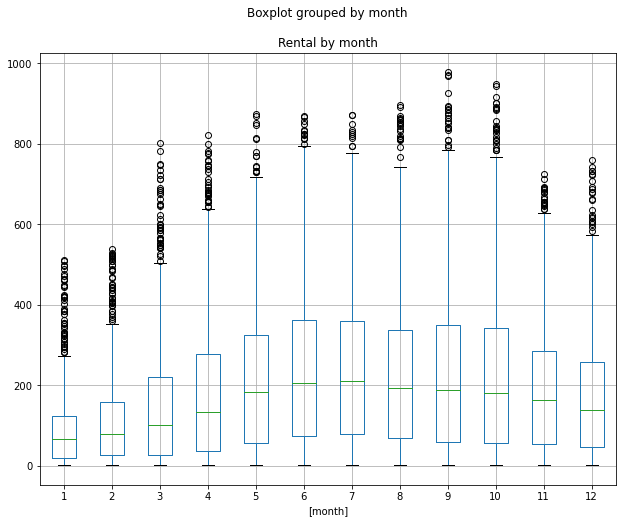

In [15]:
#visualisation of the rental bikes by month
train.boxplot(by=['month'], column='count', figsize=(10,8))
plt.title('Rental by month')

Text(0.5, 1.0, 'Rental by season')

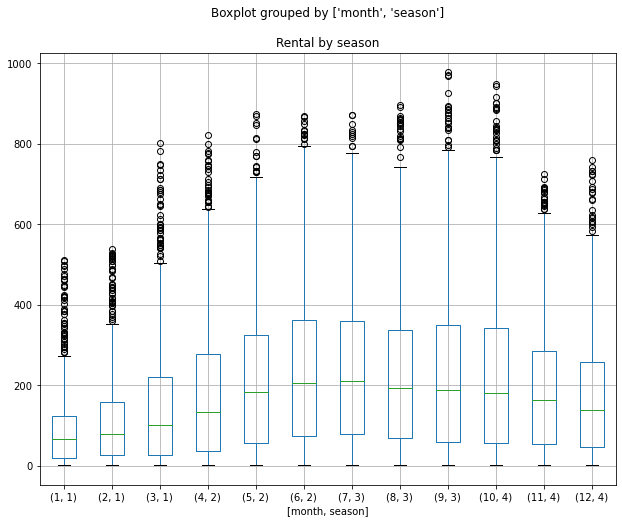

In [16]:
#visualization of the rental bikes by season
train.boxplot(by=['month','season'], column='count', figsize=(10,8))
plt.title('Rental by season')

In [17]:
#comparing casual and registered bike users visually using snsboxplot

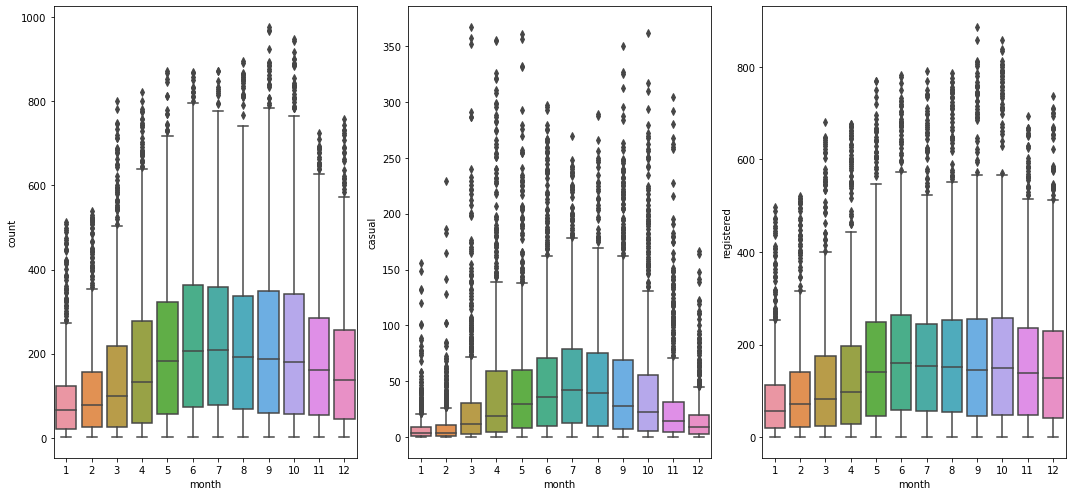

In [18]:
#fig, axs = plt.subplot(figsize=(15,7)
fig, axs = plt.subplots(1,3,figsize=(15,7))
sns.boxplot(data=train, x='month', y='count', ax=axs[0])
sns.boxplot(data=train, x='month', y='casual', ax=axs[1])
sns.boxplot(data=train, x='month', y='registered', ax=axs[2])
plt.tight_layout()

<AxesSubplot:xlabel='datetime'>

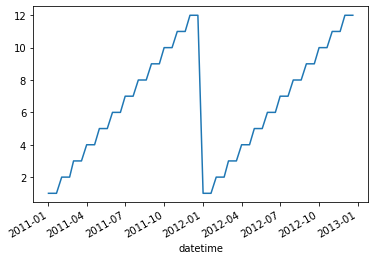

In [19]:
#smoothing the data plotting the stock
train.month.plot()

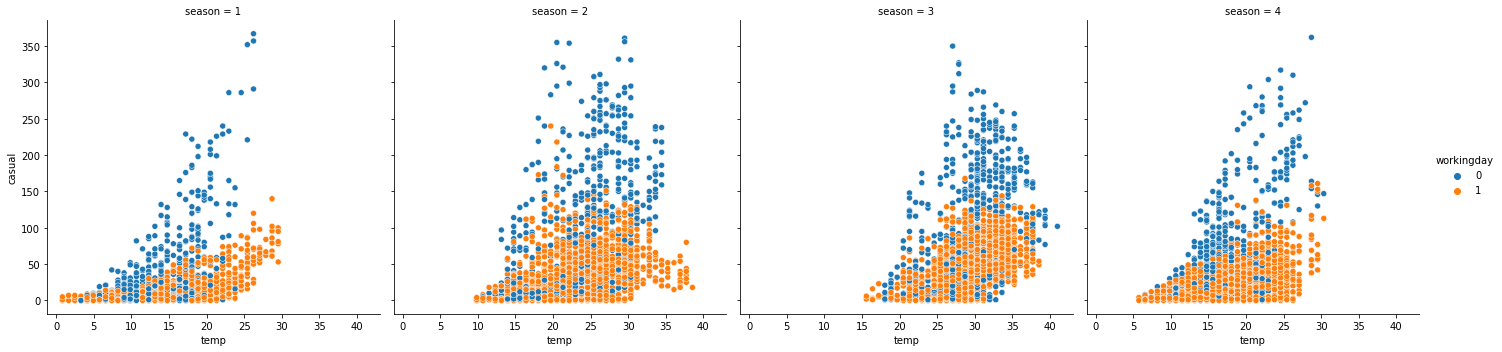

In [20]:

sns.relplot(data=train, x='temp', y='casual', col='season', 
            hue='workingday')



In [21]:
#droping the registered and casual since they are represented by count to avoid feature leakage
train.drop(['casual', 'registered'], axis=1, inplace=True)
#train.head()

In [22]:
#the summary of our data fields getting the mean, std, min and max etc
train.describe()

season       holiday    workingday       weather         temp  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.00000   
mean       2.506614      0.028569      0.680875      1.418427     20.23086   
std        1.116174      0.166599      0.466159      0.633839      7.79159   
min        1.000000      0.000000      0.000000      1.000000      0.82000   
25%        2.000000      0.000000      0.000000      1.000000     13.94000   
50%        3.000000      0.000000      1.000000      1.000000     20.50000   
75%        4.000000      0.000000      1.000000      2.000000     26.24000   
max        4.000000      1.000000      1.000000      4.000000     41.00000   

              atemp      humidity     windspeed         count   hour_of_day  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.000000   
mean      23.655084     61.886460     12.799395    191.574132     11.541613   
std        8.474601     19.245033      8.164537    181.144454      6.915838   
min        0.760000      0.000000      0.000000      1.000000      0.000000   
25%       16.665000     47.000000      7.001500     42.000000      6.000000   
50%       24.240000     62.000000     12.998000    145.000000     12.000000   
75%       31.060000     77.000000     16.997900    284.000000     18.000000   
max       45.455000    100.000000     56.996900    977.000000     23.000000   

       day_of_month  day_of_the_week  day_of_the_year         month  
count  10886.000000     10886.000000     10886.000000  10886.000000  
mean       9.992559         3.013963       177.562466      6.521495  
std        5.476608         2.004585       105.055551      3.444373  
min        1.000000         0.000000         1.000000      1.000000  
25%        5.000000         1.000000        92.000000      4.000000  
50%       10.000000         3.000000       182.500000      7.000000  
75%       15.000000         5.000000       274.000000     10.000000  
max       19.000000         6.000000       354.000000     12.000000

In [23]:
#correlation of the data
train.corr()

season   holiday  workingday   weather      temp     atemp  \
season           1.000000  0.029368   -0.008126  0.008879  0.258689  0.264744   
holiday          0.029368  1.000000   -0.250491 -0.007074  0.000295 -0.005215   
workingday      -0.008126 -0.250491    1.000000  0.033772  0.029966  0.024660   
weather          0.008879 -0.007074    0.033772  1.000000 -0.055035 -0.055376   
temp             0.258689  0.000295    0.029966 -0.055035  1.000000  0.984948   
atemp            0.264744 -0.005215    0.024660 -0.055376  0.984948  1.000000   
humidity         0.190610  0.001929   -0.010880  0.406244 -0.064949 -0.043536   
windspeed       -0.147121  0.008409    0.013373  0.007261 -0.017852 -0.057473   
count            0.163439 -0.005393    0.011594 -0.128655  0.394454  0.389784   
hour_of_day     -0.006546 -0.000354    0.002780 -0.022740  0.145430  0.140343   
day_of_month     0.001729 -0.015877    0.009829 -0.007890  0.015551  0.011866   
day_of_the_week -0.010553 -0.191832   -0.704267 -0.047692 -0.038466 -0.040235   
day_of_the_year  0.970196  0.001134   -0.003024  0.011746  0.255887  0.262245   
month            0.971524  0.001731   -0.003394  0.012144  0.257589  0.264173   

                 humidity  windspeed     count  hour_of_day  day_of_month  \
season           0.190610  -0.147121  0.163439    -0.006546      0.001729   
holiday          0.001929   0.008409 -0.005393    -0.000354     -0.015877   
workingday      -0.010880   0.013373  0.011594     0.002780      0.009829   
weather          0.406244   0.007261 -0.128655    -0.022740     -0.007890   
temp            -0.064949  -0.017852  0.394454     0.145430      0.015551   
atemp           -0.043536  -0.057473  0.389784     0.140343      0.011866   
humidity         1.000000  -0.318607 -0.317371    -0.278011     -0.011335   
windspeed       -0.318607   1.000000  0.101369     0.146631      0.036157   
count           -0.317371   0.101369  1.000000     0.400601      0.019826   
hour_of_day     -0.278011   0.146631  0.400601     1.000000      0.001132   
day_of_month    -0.011335   0.036157  0.019826     0.001132      1.000000   
day_of_the_week -0.026507  -0.024804 -0.002283    -0.002925     -0.011070   
day_of_the_year  0.203155  -0.148062  0.168056    -0.006735      0.054102   
month            0.204537  -0.150192  0.166862    -0.006818      0.001974   

                 day_of_the_week  day_of_the_year     month  
season                 -0.010553         0.970196  0.971524  
holiday                -0.191832         0.001134  0.001731  
workingday             -0.704267        -0.003024 -0.003394  
weather                -0.047692         0.011746  0.012144  
temp                   -0.038466         0.255887  0.257589  
atemp                  -0.040235         0.262245  0.264173  
humidity               -0.026507         0.203155  0.204537  
windspeed              -0.024804        -0.148062 -0.150192  
count                  -0.002283         0.168056  0.166862  
hour_of_day            -0.002925        -0.006735 -0.006818  
day_of_month           -0.011070         0.054102  0.001974  
day_of_the_week         1.000000        -0.002786 -0.002266  
day_of_the_year        -0.002786         1.000000  0.998616  
month                  -0.002266         0.998616  1.000000

<AxesSubplot:>

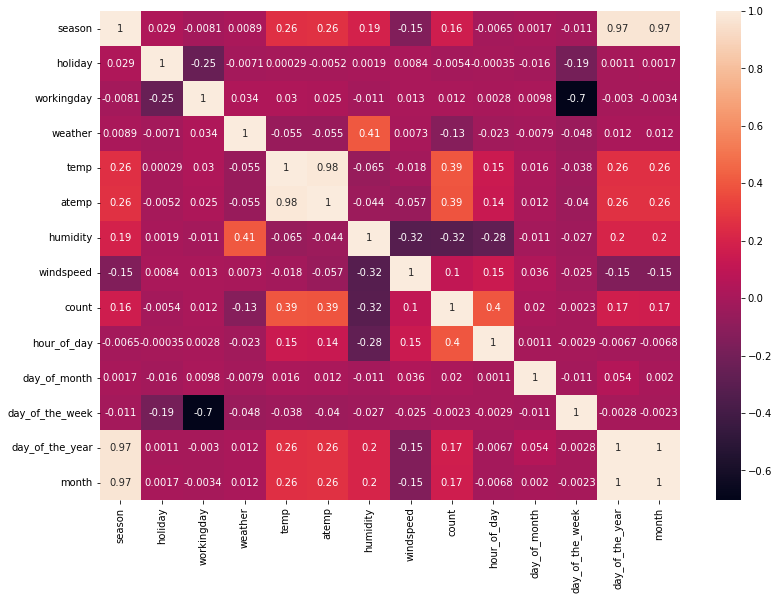

In [24]:
#getting the hetmap of the correlation
plt.figure(figsize=(13,9))
sns.heatmap(train.corr(), annot=True)

<function matplotlib.pyplot.boxplot(x, notch=None, sym=None, vert=None, whis=None, positions=None, widths=None, patch_artist=None, bootstrap=None, usermedians=None, conf_intervals=None, meanline=None, showmeans=None, showcaps=None, showbox=None, showfliers=None, boxprops=None, labels=None, flierprops=None, medianprops=None, meanprops=None, capprops=None, whiskerprops=None, manage_ticks=True, autorange=False, zorder=None, *, data=None)>

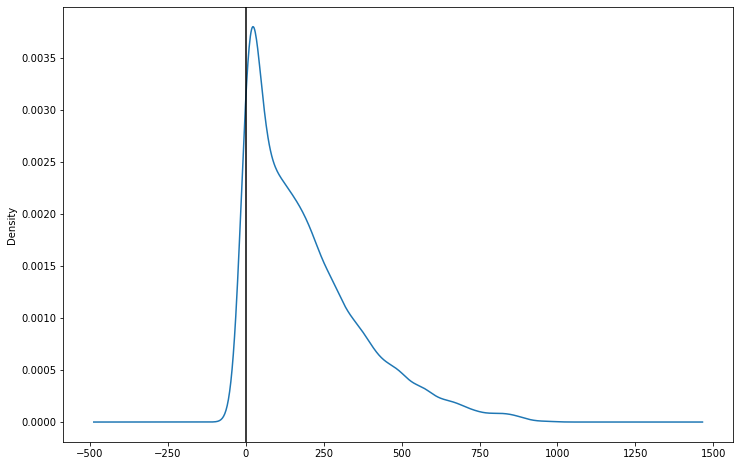

In [25]:
#visualization of the distribution
fig.axs = plt.figure(figsize=(12,8))
train['count'].plot(kind= 'density')
#plt.axvline(label='mean', color='Red' )
#plt.axvline(label='mode', color='Green' )
plt.axvline(label='median', color='Black' )
plt.boxplot

In [26]:
#getting the boxplot of the 

In [27]:
#atemp and temp, month and day_of_the_year,  has Multi-Collinearity(strongly correlated) 
#and this is why atemp and day_of_the_year will be dropped
train.drop('atemp', axis=1, inplace=True)


In [28]:
train.sample(5)

season  holiday  workingday  weather   temp  humidity  \
datetime                                                                     
2011-04-18 01:00:00       2        0           1        1  18.86        47   
2012-01-04 12:00:00       1        0           1        2   4.10        46   
2011-11-03 16:00:00       4        0           1        1  21.32        48   
2011-03-04 07:00:00       1        0           1        1   6.56        80   
2011-04-01 16:00:00       2        0           1        1  13.94        46   

                     windspeed  count  hour_of_day  day_of_month  \
datetime                                                           
2011-04-18 01:00:00     8.9981     19            1            18   
2012-01-04 12:00:00    12.9980     84           12             4   
2011-11-03 16:00:00    12.9980    267           16             3   
2011-03-04 07:00:00     8.9981     83            7             4   
2011-04-01 16:00:00    27.9993    167           16             1   

                     day_of_the_week  day_of_the_year  month  
datetime                                                      
2011-04-18 01:00:00                0              108      4  
2012-01-04 12:00:00                2                4      1  
2011-11-03 16:00:00                3              307     11  
2011-03-04 07:00:00                4               63      3  
2011-04-01 16:00:00                4               91      4

In [29]:
train.shape


(10886, 13)

In [30]:
train.info() #checking the table information

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10886 entries, 2011-01-01 00:00:00 to 2012-12-19 23:00:00
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   season           10886 non-null  int64  
 1   holiday          10886 non-null  int64  
 2   workingday       10886 non-null  int64  
 3   weather          10886 non-null  int64  
 4   temp             10886 non-null  float64
 5   humidity         10886 non-null  int64  
 6   windspeed        10886 non-null  float64
 7   count            10886 non-null  int64  
 8   hour_of_day      10886 non-null  int64  
 9   day_of_month     10886 non-null  int64  
 10  day_of_the_week  10886 non-null  int64  
 11  day_of_the_year  10886 non-null  int64  
 12  month            10886 non-null  int64  
dtypes: float64(2), int64(11)
memory usage: 1.4 MB


In [31]:
train.isnull().sum() #checking the NAN

season             0
holiday            0
workingday         0
weather            0
temp               0
humidity           0
windspeed          0
count              0
hour_of_day        0
day_of_month       0
day_of_the_week    0
day_of_the_year    0
month              0
dtype: int64

In [32]:
train.duplicated() #checking for duplicates

datetime
2011-01-01 00:00:00    False
2011-01-01 01:00:00    False
2011-01-01 02:00:00    False
2011-01-01 03:00:00    False
2011-01-01 04:00:00    False
                       ...  
2012-12-19 19:00:00    False
2012-12-19 20:00:00    False
2012-12-19 21:00:00    False
2012-12-19 22:00:00    False
2012-12-19 23:00:00    False
Length: 10886, dtype: bool

In [33]:
#Checking the impact of weather on demand
train.groupby('weather')[['count']].count()

count
weather       
1         7192
2         2834
3          859
4            1

<AxesSubplot:xlabel='weather'>

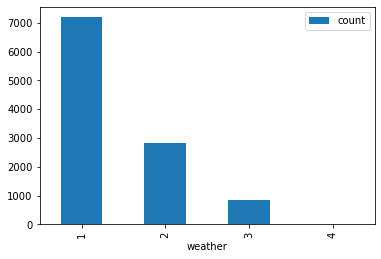

In [34]:
#visualizing the impact of weather on hiring demand
train.groupby('weather')[['count']].count().plot.bar()

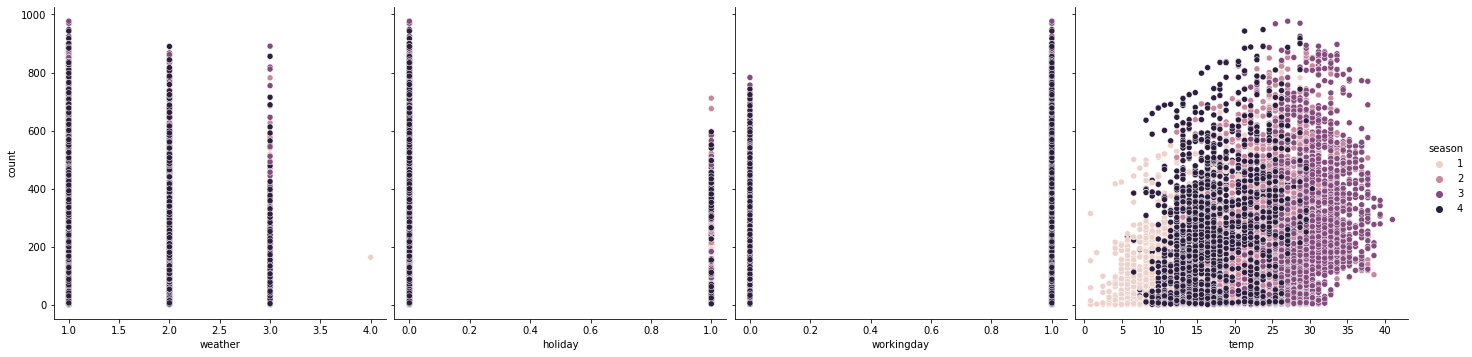

In [35]:
#using pairplot to effects of season, count and other factors
sns.pairplot(height=5, data=train, x_vars=[ 'weather', 'holiday', 'workingday', 'temp'], 
             y_vars=['count'], 
             hue='season', kind='scatter')

In [36]:
y = train['count']
X = train.drop('count', axis=1)

# train and test split

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

## feature Engineering and building pipeline

In [38]:
#creating a pipeline and asking the pipeline to use standardscaler and KbinsDiscre
my_pipe = Pipeline([('my_scaller', StandardScaler()), 
                    ('my_kbins', KBinsDiscretizer())])

In [39]:
#transforming using columnTransformar

ct = ColumnTransformer([('my_pipe',my_pipe,['temp', 'humidity','windspeed']),
                        
                        ('my_onehotencoder', OneHotEncoder(),['season', 'weather',
                                                              'hour_of_day',
                                                              'day_of_the_week', 
                                                              'day_of_month', 'month',
                                                            'holiday',  'day_of_the_year', 'workingday'])])
       

In [40]:
#Fitting and training the model
X_train_trans = ct.fit_transform(X_train)


In [41]:
X_train_trans.shape

(8708, 327)

In [42]:
X_test_trans = ct.fit_transform(X_test)

In [43]:
X_train_trans.shape, X_test_trans.shape

((8708, 327), (2178, 326))

In [44]:
#getting the name of the features to work with
#ct.get_feature_names_out()

In [45]:
#getting the name of the features to work with and putting it in a dataframe
#pd.DataFrame(trans.todense(),columns=ct.get_feature_names_out())

# modeling

In [46]:
poisson_model = Pipeline([('ct',ct), ('polynomial',PolynomialFeatures(degree=2, include_bias=False)),
                          ('poissonRegressor', PoissonRegressor(alpha=0.05))])

In [47]:
poisson_model.fit(X_train,y_train)

/Users/thuanglee/.local/lib/python3.9/site-packages/sklearn/linear_model/_glm/glm.py:294: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res)


Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('my_pipe',
                                                  Pipeline(steps=[('my_scaller',
                                                                   StandardScaler()),
                                                                  ('my_kbins',
                                                                   KBinsDiscretizer())]),
                                                  ['temp', 'humidity',
                                                   'windspeed']),
                                                 ('my_onehotencoder',
                                                  OneHotEncoder(),
                                                  ['season', 'weather',
                                                   'hour_of_day',
                                                   'day_of_the_week',
                                                   'day_of_month', 'month',
                                                   'holiday', 'day_of_the_year',
                                                   'workingday'])])),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('poissonRegressor', PoissonRegressor(alpha=0.05))])

In [48]:
y_predict = poisson_model.predict(X_test) #getting y_predict of the poisson model
y_predict

array([324.82994146, 227.32415586, 149.94282745, ..., 861.09580659,
        81.03781788, 134.40074759])

In [49]:
#getting the score of the poisson model
round(poisson_model.score(X_train,y_train),3),round(poisson_model.score(X_test, y_test),3)

(0.985, 0.956)

In [55]:
#getting the RMSE for test data
print(f'RMSE: {round(np.sqrt(mean_squared_error(y_test,y_predict)),3)}')

RMSE: 41.988


In [56]:
#getting the RSMLE
print(f'RSMLE: {round(mean_squared_log_error(y_test, y_predict),3)}')

RSMLE: 0.101
